In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

## Data preparation

In [2]:
path = "../../dataset/data_xyz/provinceData/上海市.json"
with open(path, "r") as f:
    json_data = json.load(f)
json_data

{'code': 'success',
 'data': [{'confirmedCount': 1,
   'confirmedIncr': 1,
   'curedCount': 0,
   'curedIncr': 0,
   'currentConfirmedCount': 1,
   'currentConfirmedIncr': 1,
   'dateId': 20200120,
   'deadCount': 0,
   'deadIncr': 0,
   'highDangerCount': 0,
   'midDangerCount': 0,
   'suspectedCount': 0,
   'suspectedCountIncr': 0},
  {'confirmedCount': 9,
   'confirmedIncr': 8,
   'curedCount': 0,
   'curedIncr': 0,
   'currentConfirmedCount': 9,
   'currentConfirmedIncr': 8,
   'dateId': 20200121,
   'deadCount': 0,
   'deadIncr': 0,
   'highDangerCount': 0,
   'midDangerCount': 0,
   'suspectedCount': 0,
   'suspectedCountIncr': 0},
  {'confirmedCount': 16,
   'confirmedIncr': 7,
   'curedCount': 0,
   'curedIncr': 0,
   'currentConfirmedCount': 16,
   'currentConfirmedIncr': 7,
   'dateId': 20200122,
   'deadCount': 0,
   'deadIncr': 0,
   'highDangerCount': 0,
   'midDangerCount': 0,
   'suspectedCount': 0,
   'suspectedCountIncr': 0},
  {'confirmedCount': 20,
   'confirmedIncr'

In [3]:
df_data = pd.DataFrame(json_data["data"])
df_data

,confirmedCount,confirmedIncr,curedCount,curedIncr,currentConfirmedCount,currentConfirmedIncr,dateId,deadCount,deadIncr,highDangerCount,midDangerCount,suspectedCount,suspectedCountIncr
0,1,1,0,0,1,1,20200120,0,0,0,0,0,0
1,9,8,0,0,9,8,20200121,0,0,0,0,0,0
2,16,7,0,0,16,7,20200122,0,0,0,0,0,0
3,20,4,0,0,20,4,20200123,0,0,0,0,0,0
4,33,13,0,0,32,12,20200124,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,61516,144,56157,433,4787,-294,20220511,572,5,0,13,393,0
827,61743,227,56580,423,4589,-198,20220512,574,2,0,13,393,0
828,61938,195,57302,722,4061,-528,20220513,575,1,0,13,393,0
829,62106,168,57595,293,3933,-128,20220514,578,3,0,13,393,0


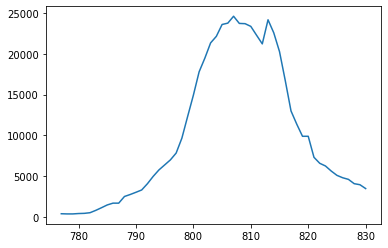

Date from 20220105 to 20220515


In [4]:
start_day = 777
end_day = df_data.shape[0]
current_confirm = df_data.currentConfirmedCount.iloc[start_day:]
plt.plot(current_confirm)
plt.show()
print("Date from %s to %s" % (df_data.loc[700,"dateId"],df_data.loc[end_day-1,"dateId"]))

## Predict

### SIR

In [5]:
from model.SIR.SIR import SIR

In [6]:
populations = pd.read_csv("../../dataset/population7th.csv")
# TODO:
all_num = populations[populations.Province == "上海"].iloc[0,1] // 15

I0_num = df_data.loc[start_day,"currentConfirmedCount"]
r0_num = df_data.loc[start_day,"deadCount"] + df_data.loc[start_day,"curedCount"]
S0_num = all_num - I0_num - r0_num

S0 = S0_num/all_num
I0 = I0_num /all_num
r0 = r0_num / all_num
print(S0_num ,I0_num, r0_num)
print(S0,I0, r0)

1652965 371 4723
0.9969277329696953 0.00022375560821418297 0.002848511422090529


In [7]:
sir = SIR(S0=S0,I0=I0,beta=1,gamma=0.8195)
# sir = SIR(S0=S0,I0=I0,beta=1,gamma=0.60)

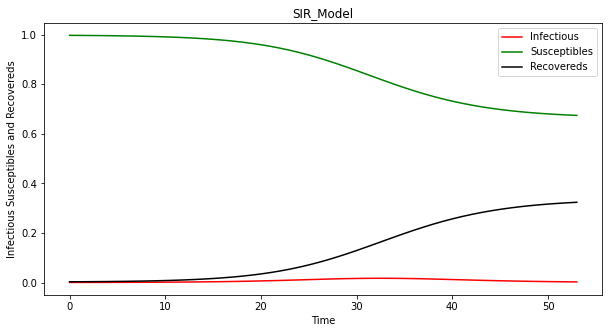

In [8]:
res = sir.predict(np.arange(0,end_day-start_day))
sir.show(res, figsize=(10,5))

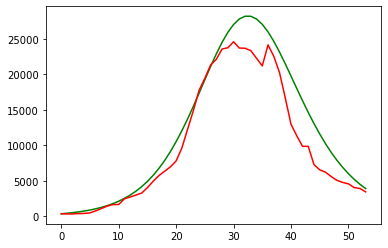

In [9]:
pre_infected = res[:,1]*all_num
gt_infected = df_data.loc[start_day:end_day-1,"currentConfirmedCount"].reset_index(drop=True)
plt.plot(pre_infected,'-g',label="predict")
plt.plot(gt_infected,'-r', label="actual")
plt.show()

### DSIR

In [10]:
from model.SIR.DSIR import DSIR

In [11]:
populations = pd.read_csv("../../dataset/population7th.csv")
# TODO:
all_num = populations[populations.Province == "上海"].iloc[0,1]

I0_num = df_data.loc[start_day,"currentConfirmedCount"]
r0_num = df_data.loc[start_day,"deadCount"] + df_data.loc[start_day,"curedCount"]
S0_num = all_num - I0_num - r0_num

S0 = S0_num/all_num
I0 = I0_num /all_num
r0 = r0_num / all_num
print(S0_num ,I0_num, r0_num)
print(S0,I0, r0)

24865801 371 4723
0.999795182280332 1.4917034549822192e-05 0.00018990068511808684


In [12]:
dsir = DSIR(S0=S0,I0=I0,contact_coef=0.0666,beta=1,gamma=0.8195)

In [13]:
dsir_res = dsir.predict(np.arange(0,end_day-start_day))

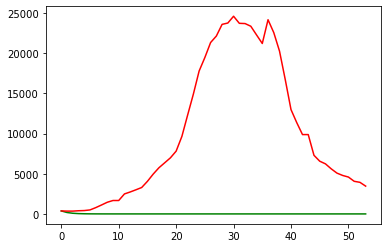

In [14]:
dsir_pre_infected = dsir_res[:,1]*all_num
gt_infected = df_data.loc[start_day:end_day-1,"currentConfirmedCount"].reset_index(drop=True)
plt.plot(dsir_pre_infected,'-g',label="predict")
plt.plot(gt_infected,'-r', label="actual")
plt.show()

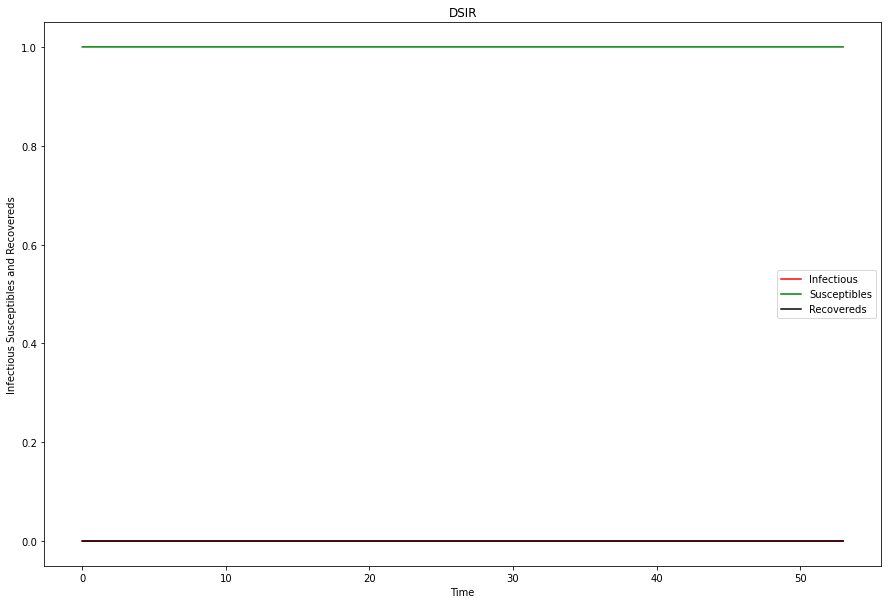

In [96]:
dsir.show(dsir_res)